<h1>Содержание<span class="tocSkip"></span></h1>
<li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Портрет пользователя" data-toc-modified-id="Портрет-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>


# Исследование продаж игр

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Есть данные до 2016 года. Сейчас декабрь 2016 г.,  ипланируется кампания на 2017-й. Данные за 2016 год могут быть неполными.<br><br>
<b>Описание данных</b><br>
<i>Name</i> — название игры<br>
<i>Platform</i> — платформа<br>
<i>Year_of_Release</i> — год выпуска<br>
<i>Genre</i> — жанр игры<br>
<i>NA_sales</i> — продажи в Северной Америке (миллионы проданных копий)<br>
<i>EU_sales</i> — продажи в Европе (миллионы проданных копий)<br>
<i>JP_sales</i> — продажи в Японии (миллионы проданных копий)<br>
<i>Other_sales</i> — продажи в других странах (миллионы проданных копий)<br>
<i>Critic_Score</i> — оценка критиков (максимум 100)<br>
<i>User_Score</i> — оценка пользователей (максимум 10)<br>
<i>Rating</i> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг<br> компьютерных игр и присваивает им подходящую возрастную категорию.<br>

## Изучение данных из файла

In [ ]:
import pandas as pd
import numpy as np 
!pip install -U seaborn
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


In [ ]:
games = pd.read_csv('/datasets/games.csv')

In [ ]:
games.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7616,Clive Barker's Jericho,PS3,2007.0,Shooter,0.17,0.01,0.0,0.02,60.0,7.1,M


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В файле есть пропуски, в некоторых столбцах данные собраны не полностью, некоторые типы данных нужно будет поменять, а названия столбцов поменять на написанные со строчными буквами, как и все строковые данные в столбцах

## Предобработка данных

Приведем данные к единообразной форме записи в низком регистре.

In [ ]:
games.columns = games.columns.str.lower()
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower() 
games['rating'] = games['rating'].str.lower() 
games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9038,monster house,ps2,2006.0,adventure,0.07,0.05,0.0,0.02,59.0,tbd,e10+


In [ ]:
games['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [ ]:
games['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [ ]:
games['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Заменим типы данных. 'year_of_release' очевидно надо перевести в int. В 'genre', 'platform' и 'rating' немного уникальных значений, значит их можно перевести в тип category, чтобы сэкономить память. 'user_score' должен быть в численном виде. там встречается nan и to be determined - переведем первые в -1, вторые в -2, чтобы сразу было видно, что значения отсутствуют и в то же время различаются. Потом их можно будет не принимать в расчет<br>
Рейтинговые значения могу отстутсвовать потому, что игры непопулярны и информацию по ним трудно найти. Лучше не заменять тут пропуски.<br>
Пропуски по году выпуска могут быть случайными, их немного, нет смысла их заменять.

In [ ]:
games['year_of_release'] = games['year_of_release'].astype('Int16')
games[['genre', 'platform', 'rating']] = games[['genre', 'platform', 'rating']].astype('category')

games['user_score'] = games['user_score'].fillna(-1)
games['user_score']=games['user_score'].replace(to_replace='tbd',value='-2')
games['user_score'] = games['user_score'].astype('float')
games['critic_score'] = games['critic_score'].astype('Int16')
games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8954,tamagotchi collection,ds,2011,misc,0.0,0.0,0.15,0.0,NaN,-1.0,NaN


Добавим столбец с итоговыми продажами по всем регионам

In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
column_names = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']
games = games.reindex(columns=column_names)
games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1676,f1 2011,ps3,2011,racing,0.12,0.74,0.11,0.24,1.21,82,7.1,e


In [ ]:
games['rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
rp         3
k-a        3
ao         1
Name: rating, dtype: int64

В 1998 k-a был переименован в e. ao только 1 игра, удалим ее, как и rp c 3 появлениями. ec можно добавить к e10+

In [ ]:
games['rating'] = games['rating'].replace({'ec': 'e10+', 'k-a': 'e' })
games['rating'] = games['rating'].replace('ao', np.nan)
games['rating'] = games['rating'].replace('rp', np.nan)
games['rating'] = games['rating'].fillna('unrated')

In [ ]:
games['rating'].unique()

array(['e', 'unrated', 'm', 't', 'e10+'], dtype=object)

## Анализ данных

Посмотрим, сколько игр выпускалось за предыдущие годы

Text(0, 0.5, 'Count of games')

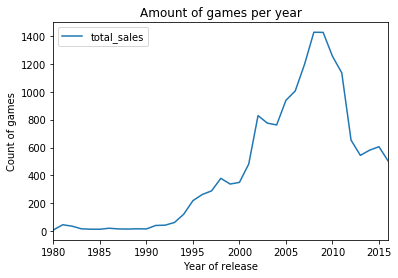

In [ ]:
games_years = games.pivot_table(index = 'year_of_release', values='total_sales', aggfunc='count')
ax = games_years.plot(title='Amount of games per year')
ax.set_xlabel("Year of release")
ax.set_ylabel("Count of games")


Все годы брать в расчет не будем - слишком радикально менялась индустрия с 1980-х. В 1980-х игр было мало, потом пошел заметный рост с пиком в 2010-x. Логичнее всего взять период последних 5 лет, там похожее количество игр.

Самые прибыльные платформы:

In [ ]:
games_platform = games.pivot_table(index = ['platform'], values='total_sales', aggfunc='sum').sort_values(by=['total_sales'], axis=0, ascending=False).reset_index().head(8)
games_platform

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14


Text(0.5, 1, 'Popular platforms lifecycle')

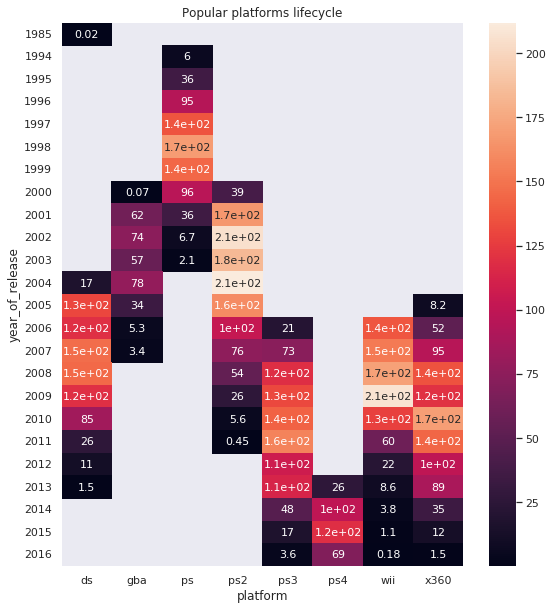

In [ ]:
games_platform_year = games.pivot_table(index = ['platform', 'year_of_release'], values='total_sales', aggfunc='sum').sort_values(by=['total_sales'], axis=0, ascending=False).reset_index()
filtered_platform = games_platform_year[games_platform_year['platform'].isin(games_platform['platform'])]
filtered = filtered_platform.pivot_table(index = 'year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
sns.set(rc={'figure.figsize':(9,10)})
sns.heatmap(filtered, annot=True, annot_kws={"size": 11})
ax = plt.axes()
ax.set_title('Popular platforms lifecycle')


Платформа живет примерно 10 лет.

In [ ]:
games_platform_year.query('year_of_release ==2015')

,platform,year_of_release,total_sales
25,ps4,2015,118.90
46,xone,2015,60.14
91,3ds,2015,27.78
115,ps3,2015,16.82
116,wiiu,2015,16.35
128,x360,2015,11.96
145,pc,2015,8.52
155,psv,2015,6.25
197,wii,2015,1.14
223,psp,2015,0.12


Самые популярные в предыдущем году и потенциально прибыльные  - ps4, xone, 3ds. PC остается как всегда релевантная.<br>
xbox 360, wii, ps3 уxодят в прошлое.

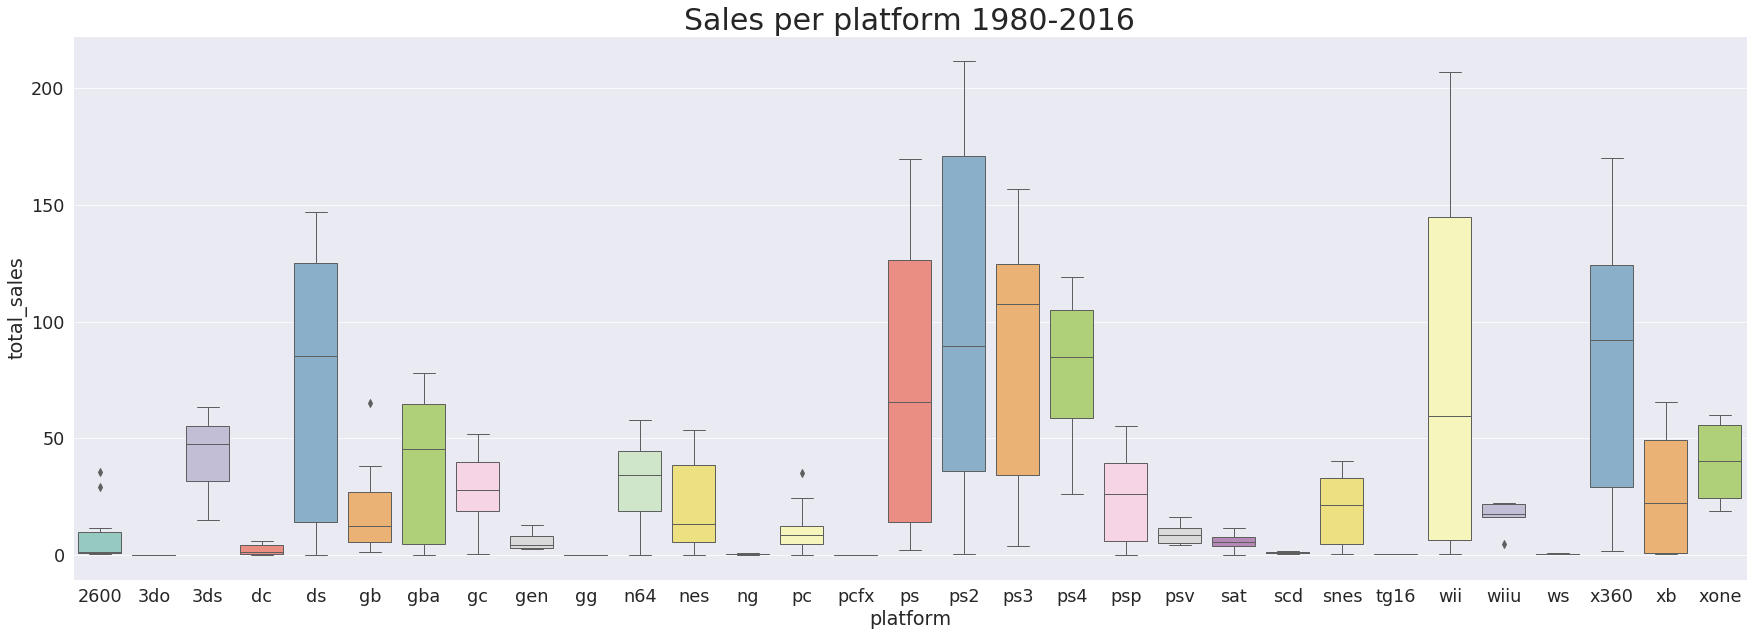

In [ ]:
sns.boxplot(x='platform', y='total_sales', data=games_platform_year, palette="Set3", linewidth=1)
ax = plt.axes()
sns.set(rc={'figure.figsize':(30,10)})
ax.set_title('Sales per platform 1980-2016', fontsize = 30)
sns.set_context("paper", font_scale=2)   

По этому графику по размеру каждого "ящика" хорошо видно самые прибыльные и самые незначительные платформы. Новые прибыльные платформы на этом графике выглядят небольшими, потому что нет полных данных об их жизненном цикле. У популярных платформ, уходящих в прошлое, все равно остаются "хвосты" - люди продолжают покупать игры для полюбившейся платформы, даже если она становится менее популярна.

Посчитаем корреляцию между отзывами критиков и продажами и отзывами пользователей и продажами для одной популярной платформы - ps4.

На основе предыдущих выводов о сроке жизни платформы и о перемене в игровой индустрии с 2010 года, возьмем в свой набор данных для работы только игры, выпущенные позже 2013 года.

In [ ]:
our_games = games.query ('year_of_release > 2013')
our_games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
563,yokai watch 2 shinuchi,3ds,2014,role-playing,0.0,0.0,2.68,0.0,2.68,NaN,-1.0,unrated


In [ ]:
ps4 = our_games.query ('platform == "ps4"')
ps4 = ps4.dropna(subset = ['critic_score'])
ps4['total_sales'] = ps4['total_sales'].astype('int16')
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,12,97,8.3,m
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,8,82,4.3,e
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,7,83,5.7,m
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,7,85,5.0,e
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,7,87,6.5,m
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,super dungeon bros,ps4,2016,action,0.01,0.00,0.00,0.00,0,42,2.3,e10+
16499,sherlock holmes: the devil's daughter,ps4,2016,adventure,0.01,0.00,0.00,0.00,0,70,6.8,t
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,0,69,7.5,unrated
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,0,61,7.9,t


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.3649325200909993

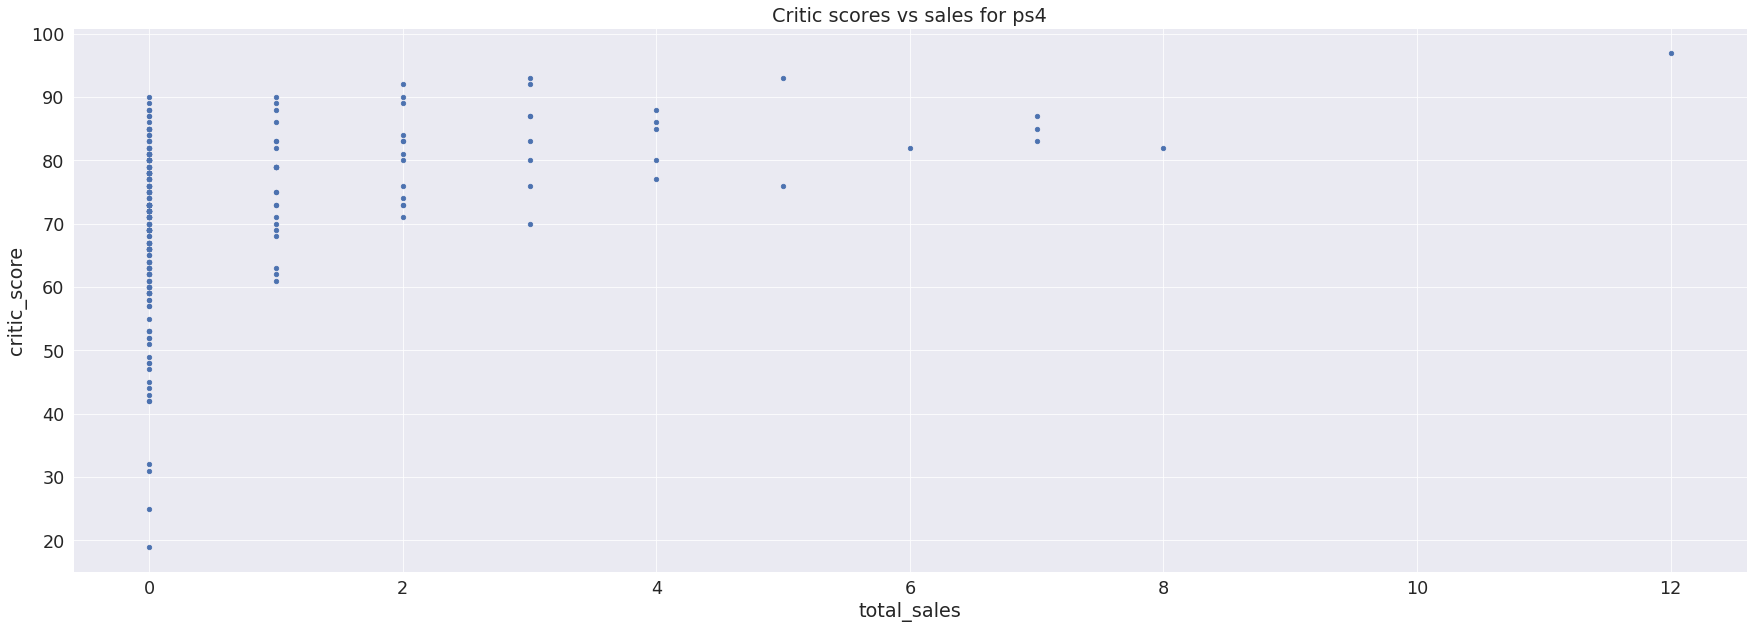

In [ ]:
ps4.plot(x='total_sales', y='critic_score', kind='scatter', title ='Critic scores vs sales for ps4')
ps4['total_sales'] = ps4['total_sales'].astype('int16')
ps4['critic_score'] = ps4['critic_score'].astype('int16')
a = ps4['total_sales'].corr(ps4['critic_score'])
a


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


-0.04311077135067621

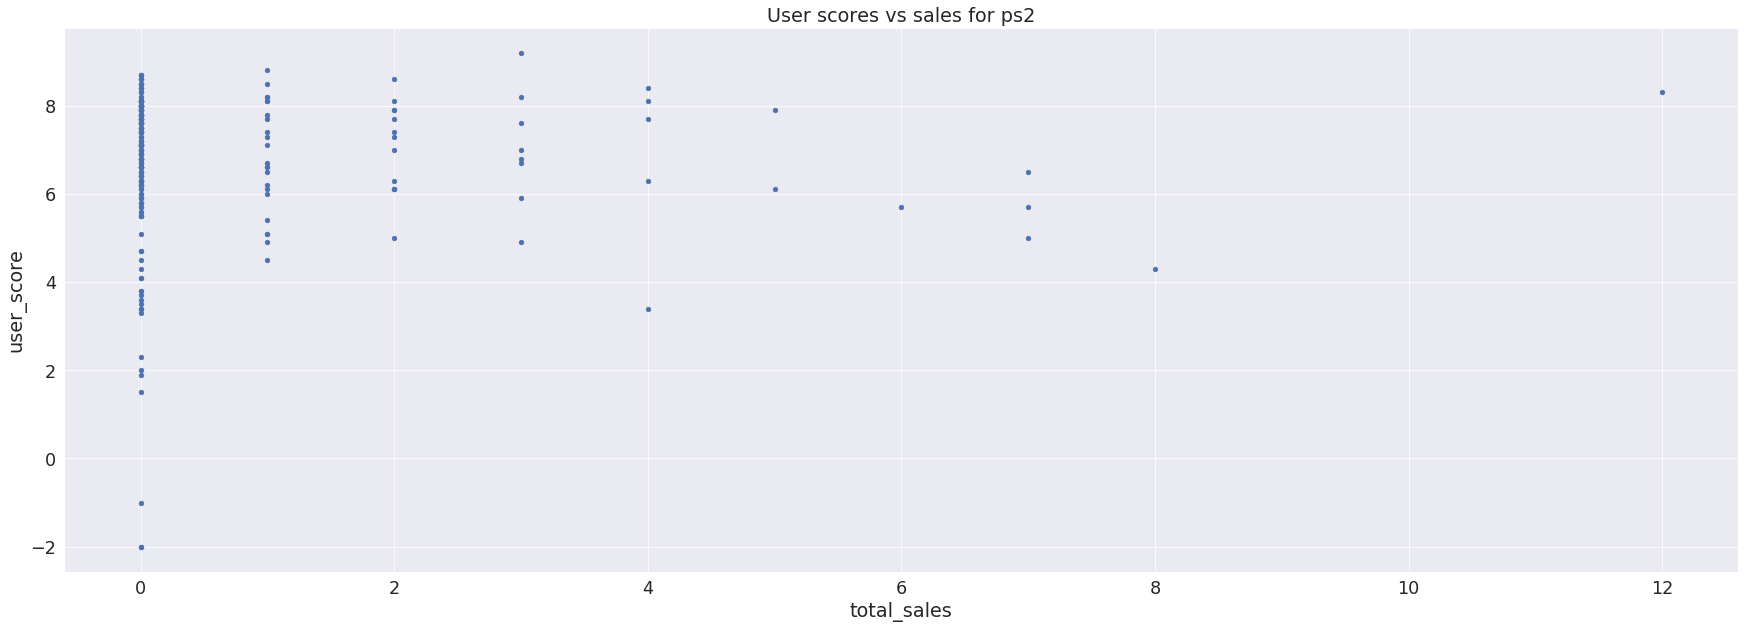

In [ ]:
ps4.plot(x='total_sales', y='user_score', kind='scatter', title ='User scores vs sales for ps2')
ps4['total_sales'] = ps4['total_sales'].astype('int16')
ps4['user_score'] = ps4['user_score'].astype('float16')
ps4 = ps4.query('user_score != -1')
ps4 = ps4.query('user_score != -2')
a = ps4['total_sales'].corr(ps4['user_score'])
a


Никакой корреляции между отзывами пользователей и продажами и отзывами критиков и продажами нет. А также корреляция не говорит о причинно-следственной связи. Чем выше оценки критиков, тем выше продажи игр, но нельзя сказать, что высокие оценки приводят к высоким продажам.

In [ ]:
games_platform = our_games.pivot_table(index = ['genre'], values='total_sales', aggfunc='median').sort_values(by=['total_sales'], axis=0, ascending=False).reset_index()
games_platform

,genre,total_sales
0,shooter,0.515
1,sports,0.180
2,platform,0.140
3,fighting,0.125
4,role-playing,0.110
5,simulation,0.100
6,action,0.090
7,misc,0.090
8,racing,0.090
9,strategy,0.060


Самые прибыльный жанр - shooter, самый неприбыльный - adventure. Они значимо отделяются от своих соседей.

## Портрет пользователя

Для Европы определим самые популярные платформы и жанры; посмотрим на рейтинг

In [ ]:
genres_eu = our_games.pivot_table(index = ['genre'], values='eu_sales', aggfunc='median').sort_values(by=['eu_sales'], axis=0, ascending=False).reset_index().head()
genres_eu

,genre,eu_sales
0,shooter,0.220
1,platform,0.055
2,racing,0.050
3,sports,0.050
4,simulation,0.030


In [ ]:
platform_eu = our_games.pivot_table(index = ['platform'], values='eu_sales', aggfunc='median').sort_values(by=['eu_sales'], axis=0, ascending=False).reset_index().head()
platform_eu

,platform,eu_sales
0,wii,0.12
1,ps4,0.07
2,xone,0.07
3,wiiu,0.06
4,pc,0.05


In [ ]:
rating_eu = our_games.pivot_table(index = ['rating'], values='eu_sales', aggfunc='median').sort_values(by=['eu_sales'], axis=0, ascending=False).reset_index().head()
rating_eu

,rating,eu_sales
0,m,0.12
1,e10+,0.09
2,e,0.05
3,t,0.04
4,unrated,0.00


Для Америки:

In [ ]:
genres_na = our_games.pivot_table(index = ['genre'], values='na_sales', aggfunc='median').sort_values(by=['na_sales'], axis=0, ascending=False).reset_index().head()
genres_na

,genre,na_sales
0,shooter,0.220
1,platform,0.075
2,sports,0.070
3,fighting,0.040
4,racing,0.030


In [ ]:
platform_na = our_games.pivot_table(index = ['platform'], values='na_sales', aggfunc='median').sort_values(by=['na_sales'], axis=0, ascending=False).reset_index().head()
platform_na

,platform,na_sales
0,x360,0.10
1,xone,0.10
2,wiiu,0.09
3,ps4,0.05
4,wii,0.04


In [ ]:
rating_na = our_games.pivot_table(index = ['rating'], values='na_sales', aggfunc='median').sort_values(by=['na_sales'], axis=0, ascending=False).reset_index().head(10)
rating_na

,rating,na_sales
0,m,0.12
1,e10+,0.10
2,e,0.05
3,t,0.03
4,unrated,0.00


Для Японии:

In [ ]:
genres_jp = our_games.pivot_table(index = ['genre'], values='jp_sales', aggfunc='median').sort_values(by=['jp_sales'], axis=0, ascending=False).reset_index().head()
genres_jp

,genre,jp_sales
0,role-playing,0.05
1,fighting,0.03
2,puzzle,0.03
3,action,0.01
4,adventure,0.01


In [ ]:
platform_jp = our_games.pivot_table(index = ['platform'], values='jp_sales', aggfunc='median').sort_values(by=['jp_sales'], axis=0, ascending=False).reset_index().head()
platform_jp

,platform,jp_sales
0,3ds,0.055
1,psv,0.030
2,ps3,0.020
3,psp,0.020
4,ps4,0.015


In [ ]:
rating_jp = our_games.pivot_table(index = ['rating'], values='jp_sales', aggfunc='median').sort_values(by=['jp_sales'], axis=0, ascending=False).reset_index().head(4)
rating_jp

,rating,jp_sales
0,unrated,0.02
1,t,0.01
2,e,0.00
3,e10+,0.00


<b>Рейтинг ESRB:</b><br>
e - everyone<br>
e10+ - everyone 10 and older<br>
t - teen<br>
m - mature<br>


Любимые жанры и платформы различаются от региона к региону, при этом у европейцев и Северной Америки больше сходства - по жанрам абсолютный лидер shooter, а в Японии role-playing. По платформам европейцы предпочитают nintendo wii, американцы xbox 360, а японцы nintendo 3ds. Продажи по рейтингу ESRB очень схожи в Европе и Северной Америке, Япония отличается: m популярнее в Европе и Северной Америке, t - в Японии.

## Проверка гипотез

Нулевая гипотеза обычно предполагает равенство сравниваемых параметров. Для проверки гипотез был выбран критерий Стьюдента, потому что выборки небольшие

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br>
H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [ ]:
final_rating = our_games.pivot_table(index = 'name', columns='platform', values = 'user_score', aggfunc= 'mean')
final_rating = final_rating.query('pc != -1')
final_rating = final_rating.query('pc != -2')
final_rating = final_rating.query('xone != -1')
final_rating = final_rating.query('xone != -2')
final_rating.sample()

In [ ]:
alpha = .05
results = st.ttest_ind(final_rating['xone'].dropna(), final_rating['pc'].dropna(), equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

H0: Средние пользовательские рейтинги жанров action и sports одинаковые.<br>
H1: Средние пользовательские рейтинги жанров action и sports разные.

In [ ]:
final_genre = our_games.pivot_table(index = 'name', columns='genre', values = 'user_score', aggfunc= 'mean')
final_genre = final_genre.query('action != -1')
final_genre = final_genre.query('action != -2')
final_genre = final_genre.query('sports != -1')
final_genre = final_genre.query('sports != -2')
final_genre.sample()

In [ ]:
alpha = .05
results = st.ttest_ind(final_genre['action'].dropna(), final_genre['sports'].dropna(), equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Пользовательские рейтинги платформ Xbox One и PC значимо не отличаются. Пользовательские рейтинги жанров action и sports отличаются.

## Общий вывод

В среднем игровая платформа живет около 10 лет, потом ей на смену приходят новые. В новом 2017 году можно сделать ставку на ps4, xone, 3ds, pc. Xbox 360, wii, ps3 уxодят в прошлое, но при этом у них все еще остается группа ценителей.<br> 
В европейском и североамериканском регионе имеет смысл продавать игры жанра shooting, в Японии - role-playing. Продажи по рейтингу ESRB схожи в Европе и Северной Америке, Япония отличается: игры для людей старше 17 самые популярные в Европе и Северной Америке, игры для подростков - в Японии.<br> 
Пользовательские отзывы и отзывы критиков не влияют на популярность игр. Пользовательские рейтинги платформ xone и pс значимо не отличаются. Пользовательские рейтинги игра в жанрах action и sports отличаются.